In [ ]:
# Importación de los módulos principales
import pandas as pd
import numpy as np

# Ajustamos la configuración de jupyter para que podamos ver más filas y columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Descripcion del problema

En este caso vamos a trabajar con un dataset que incluye detalles de todos los listados de Airbnb en la ciudad de Nueva York en 2023. Este conjunto de datos proporciona información detallada sobre cada listado, incluyendo el precio por noche, el número mínimo de noches requeridas, el total de reseñas recibidas, el promedio de reseñas por mes, el número de listados gestionados por el anfitrión y la disponibilidad del listado en un año. Este dataset es ideal para realizar análisis exploratorios y construir modelos de machine learning que pueden ayudar a predecir precios, evaluar la demanda, y analizar patrones de comportamiento de los huéspedes y anfitriones.

Podéis encontrar más información acerca de los datos en: [New York City Airbnb 2023, Public Data](https://www.kaggle.com/datasets/godofoutcasts/new-york-city-airbnb-2023-public-data).

Para conocer mejor los campos que conforman este dataset también podemos acudir a la [exploración de datos en Kaggle](https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb).

Este dataset permite un análisis profundo de los listados de Airbnb en Nueva York y puede ser utilizado para varios fines analíticos y predictivos, incluyendo la discretización de variables clave para mejorar la precisión de los modelos predictivos.

Visualizar los datos. Cargar el dataset y mostrar las primeras 30 filas

In [ ]:
#Cargamos el dataset
df_room = (
    pd.read_csv('/content/NYC-Airbnb-2023.csv')
)

<ipython-input-2-ec4f5c222cd2>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/content/NYC-Airbnb-2023.csv')


In [ ]:
#Mostramos las 30 primeras filas
df_room.head(30)

id                                               name  host_id  \
0    2595                              Skylit Midtown Castle     2845   
1    5121                                    BlissArtsSpace!     7356   
2    5203                 Cozy Clean Guest Room - Family Apt     7490   
3    5178                   Large Furnished Room Near B'way　     8967   
4    5136        Large Sunny Brooklyn Duplex, Patio + Garden     7378   
5   29628                            Comfortable, Sunny Room   127608   
6    5586                 Rooftop Deck/City Views. Great Apt     8526   
7    5803      Lovely, Cozy, Room 1, BEST AREA; Legal Rental     9744   
8   31130                             Most Central Location!   117287   
9    6848                   Only 2 stops to Manhattan studio    15991   
10   6872  Uptown Sanctuary w/ Private Bath (Month to Month)    16104   
11  67288                       Central Park 1BR sunny condo   101597   
12  31555             Luminous Beautiful West Village Studio   135619   
13  67299             Cozy Garden Apartment  in Williamsburg   330347   
14  31902                         Sanctuary in East Flatbush   137292   
15  68253                       Room in the heart of Astoria    67730   
16   6990                            UES Beautiful Blue Room    16800   
17  31994                 Room with En Suite Bathroom & Deck   137814   
18  32037                 Huge Private  Floor at The Waverly   116599   
19   7064  Amazing location! Wburg. Large, bright & tranquil    17297   
20  68735                 Prewar Penthouse w Private Terrace   342054   
21  68900                          Bright Beautiful Brooklyn   343250   
22  33009                            Retreat in Williamsburg   143027   
23  68974                 Unique spacious loft on the Bowery   281229   
24   7097  Perfect for Your Parents: 1000sqft, Privacy, P...    17571   
25  33156                    Sunny, Clean Zen Home w pr.Bath   128669   
26   7801                   Sweet and Spacious Brooklyn Loft    21207   
27  36121                 Lg Rm in Historic Prospect Heights    62165   
28  69894                Nice renovated apt, prime location!   352168   
29  36647       Private Bedroom/Bathroom, Elevator Apartment   157798   

        host_name neighbourhood_group       neighbourhood   latitude  \
0        Jennifer           Manhattan             Midtown  40.753560   
1           Garon            Brooklyn  Bedford-Stuyvesant  40.685350   
2       MaryEllen           Manhattan     Upper West Side  40.803800   
3        Shunichi           Manhattan             Midtown  40.764570   
4         Rebecca            Brooklyn         Sunset Park  40.662650   
5           Chris            Brooklyn        Clinton Hill  40.682920   
6           Susan           Manhattan     Upper East Side  40.760760   
7          Laurie            Brooklyn         South Slope  40.668010   
8     Lara Nicole           Manhattan      Hell's Kitchen  40.767200   
9   Allen & Irina            Brooklyn        Williamsburg  40.709350   
10            Kae           Manhattan         East Harlem  40.801070   
11            Per           Manhattan         East Harlem  40.795440   
12            Tom           Manhattan        West Village  40.734050   
13       Adrienne            Brooklyn        Williamsburg  40.715160   
14         Sunder            Brooklyn       East Flatbush  40.632700   
15          Boris              Queens             Astoria  40.763360   
16            Cyn           Manhattan         East Harlem  40.787780   
17       Waldemar            Brooklyn        Clinton Hill  40.688180   
18           Sahr            Brooklyn        Clinton Hill  40.685130   
19         Joelle            Brooklyn        Williamsburg  40.712480   
20       Violetta           Manhattan     Upper West Side  40.788460   
21          Jason            Brooklyn          Greenpoint  40.730940   
22           Ming            Brooklyn        Williamsburg  40.715120   
23         Alic

Comprobar el esquema de los datos.

In [ ]:
#Comprobamos la info
df_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

In [ ]:
# Veamos si existen duplicados
print(len(df_room))
print(len(df_room.drop_duplicates()))

42931
42931


In [ ]:
print("cantidad de barrios:", len(df_room["neighbourhood_group"].unique()))

cantidad de barrios: 5


In [ ]:
df_room[["minimum_nights","price","availability_365"]].describe()

minimum_nights         price  availability_365
count    42931.000000  42931.000000      42931.000000
mean        18.111178    200.307167        140.262211
std         27.462513    895.082911        142.001486
min          1.000000      0.000000          0.000000
25%          2.000000     75.000000          0.000000
50%          7.000000    125.000000         89.000000
75%         30.000000    200.000000        289.000000
max       1250.000000  99000.000000        365.000000

In [ ]:
#Con esto podemos ir sacando conlusiones sobre nuestro dataset
#Aqui podemos ver las diferentes variables, vemos que hay variables que no aportan valor para este caso
#las eliminare del datset un poquito mas adelante
#Tambien vemos que tenemos una variable en forma de fecha
#Vemos variables categoricas a las que seria conveniente transformar, neighbourhood_group, room_type

Volumen de datos faltantes.

In [ ]:
#Volumen de datos faltantes
df_isnull = df_room.isnull().sum().sort_values(ascending=False)
df_isnull

license                           42930
reviews_per_month                 10304
last_review                       10304
name                                 12
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [ ]:
#Porcentaje de datos faltantes
df_null_porcentaje = round ((df_isnull/len(df_room.axes[0]))*100, 2)
df_null_porcentaje

license                           100.00
reviews_per_month                  24.00
last_review                        24.00
name                                0.03
host_name                           0.01
minimum_nights                      0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
id                                  0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
neighbourhood_group                 0.00
host_id                             0.00
price                               0.00
dtype: float64

In [ ]:
#Total de datos faltantes
valores_totales = np.product(df_room.shape)
valores_nulos_totales = df_isnull.sum()

#Porcentaje total de nulos
porcentaje_total_null = round((valores_nulos_totales/valores_totales)*100,2)
print(f"Hay un {porcentaje_total_null} de datos faltantes en el conjunto total de nuestro dataset")

Hay un 8.22 de datos faltantes en el conjunto total de nuestro dataset


En el caso concreto de `license`, ¿tienen sentido todos los valores nulos?

In [ ]:
#Porcentaje total de nulos en license, casi el 100% son nulos.
df_null_license = df_isnull["license"]
df_null_license

42930

In [ ]:
#Vemos los valores dentro de la columna license
df_room['license'].unique()

array([nan, '41662/AL'], dtype=object)

In [ ]:
#Aqui arriba vemos los valores nulos de license y parece que tambien hay lo que parece un numero de licencia.

In [ ]:
#Vemos en que fila se encuentra el valor 41662/AL

# Crear una máscara booleana
mask = df_room['license'] == '41662/AL'

# Mostrar las filas donde la condición es verdadera
result = df_room[mask]
print("\nFila(s) que contienen '41662/AL':")
print(result)

# Obtener el índice de la fila donde está el valor
index = df_room.index[mask].tolist()
print("\nÍndice de la fila con '41662/AL':", index)


Fila(s) que contienen '41662/AL':
             id                          name    host_id host_name  \
10101  17984049  Apartamento Algarve Holidays  120181746    Isabel   

      neighbourhood_group      neighbourhood  latitude  longitude  \
10101           Manhattan  Flatiron District  40.74075  -73.98902   

             room_type  price  minimum_nights  number_of_reviews last_review  \
10101  Entire home/apt    133              30                  1  2017-07-19   

       reviews_per_month  calculated_host_listings_count  availability_365  \
10101               0.01                               1               126   

       number_of_reviews_ltm   license  
10101                      0  41662/AL  

Índice de la fila con '41662/AL': [10101]


In [ ]:
#Vemos que hay una fila que si contiene un valor en license, la fila es la 10101.

In [ ]:
print(df_room.iloc[10101])

id                                                    17984049
name                              Apartamento Algarve Holidays
host_id                                              120181746
host_name                                               Isabel
neighbourhood_group                                  Manhattan
neighbourhood                                Flatiron District
latitude                                              40.74075
longitude                                            -73.98902
room_type                                      Entire home/apt
price                                                      133
minimum_nights                                              30
number_of_reviews                                            1
last_review                                         2017-07-19
reviews_per_month                                         0.01
calculated_host_listings_count                               1
availability_365                                       

In [ ]:
#Para encontrar la logica de por que hay un solo numero de licencia, podemos investigar sobre su obligatoriedad.
#Por lo que parece hubo una reforma sobre la normativa airbnb en NY en septiembre de 2023, podria deberse a eso.

TrataR de explicar el motivo de valores faltantes. ¿Existe alguna relación entre los valores faltantes de `reviews_per_month` y la columna `last_review` ?.
Ambas columas presentan datos faltantes

In [ ]:
#COMPROBACION 1

In [ ]:
#Vemos que existe el mismo numero de nulos en los dos

In [ ]:
# Verificar los valores faltantes
print(df_room[['reviews_per_month', 'last_review']].isna().sum())

# Ver filas donde reviews_per_month es NaN
reviews_na = df_room[df_room['reviews_per_month'].isna()]
print("Número de filas donde reviews_per_month es NaN:", len(reviews_na))

# Verificar si last_review también es NaN en esas filas
reviews_na_with_last_review_na = reviews_na[reviews_na['last_review'].isna()]
print("Número de filas donde ambas columnas son NaN:", len(reviews_na_with_last_review_na))

# Calcular proporción de valores faltantes en ambas columnas
total_rows = len(df_room)
proportion_both_na = ((len(reviews_na_with_last_review_na) / total_rows)*100)
print("Proporción de filas donde ambas columnas son NaN:", proportion_both_na)

reviews_per_month    10304
last_review          10304
dtype: int64
Número de filas donde reviews_per_month es NaN: 10304
Número de filas donde ambas columnas son NaN: 10304
Proporción de filas donde ambas columnas son NaN: 24.00130441871841


In [ ]:
#Si la filas totales son 42931
#Y filas en este caso de nulos 10304
#Asi vemos que el porcentaje es de 24% hay los mismos nulos en los dos, estas columnas podrian estar directamente relacionadas.

In [ ]:
#COMPROBACION 2
#Vemos el numero de valores en cada columna.
#En este caso vemos que estan relacionadas ya que tienen el mismo numero de valores.

In [ ]:
df_room["reviews_per_month"].value_counts().sum()

32627

In [ ]:
df_room["last_review"].value_counts().sum()

32627

Realizar otro análisis para detectar las columnas que aporten mayor valor.

In [ ]:
#Podemos eliminar las variables que vemos a priori no tengan valor en este caso
df_room = df_room.drop(columns=['name', 'host_name', 'license', 'id', 'number_of_reviews_ltm', 'calculated_host_listings_count', 'last_review'])

In [ ]:
df_room.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'availability_365'],
      dtype='object')

In [ ]:
df_room.isnull().sum()

host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10304
availability_365           0
dtype: int64

In [ ]:
df_room.head()

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0     2845           Manhattan             Midtown  40.75356  -73.98559   
1     7356            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2     7490           Manhattan     Upper West Side  40.80380  -73.96751   
3     8967           Manhattan             Midtown  40.76457  -73.98317   
4     7378            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    150              30                 49   
1     Private room     60              30                 50   
2     Private room     75               2                118   
3     Private room     68               2                575   
4  Entire home/apt    275              60                  3   

   reviews_per_month  availability_365  
0               0.30               314  
1               0.30               365  
2               0.72                 0  
3               3.41               106  
4               0.03               181

In [ ]:
df_room['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: count, dtype: int64

In [ ]:
#Mostramos el precio mas alto por barrios y vemos que el mayor es Brooklyn y el menor el Bronx
df_room.groupby(["neighbourhood_group"])[["price"]].max()

price
neighbourhood_group       
Bronx                 9994
Brooklyn             99000
Manhattan            85100
Queens               10000
Staten Island        65115

<Axes: title={'center': 'Cantidad de alojamientos por barrio'}, xlabel='count', ylabel='neighbourhood_group'>

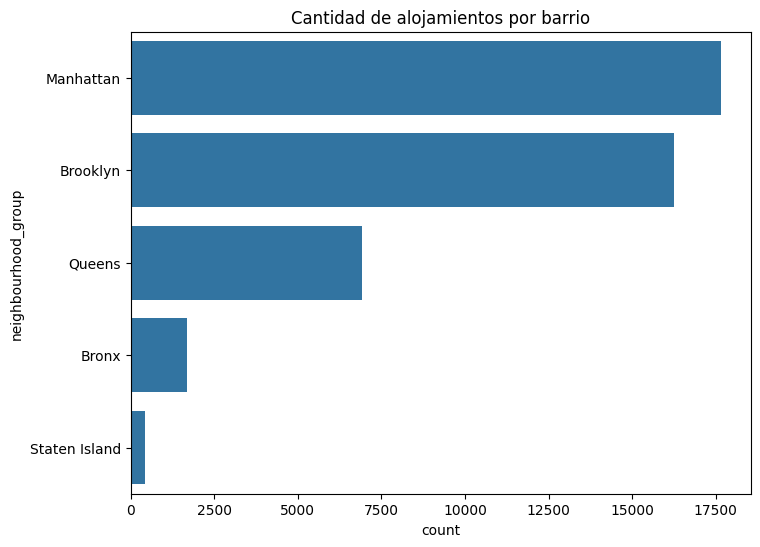

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("Cantidad de alojamientos por barrio")
sns.countplot(df_room['neighbourhood_group'])

<Figure size 640x480 with 0 Axes>

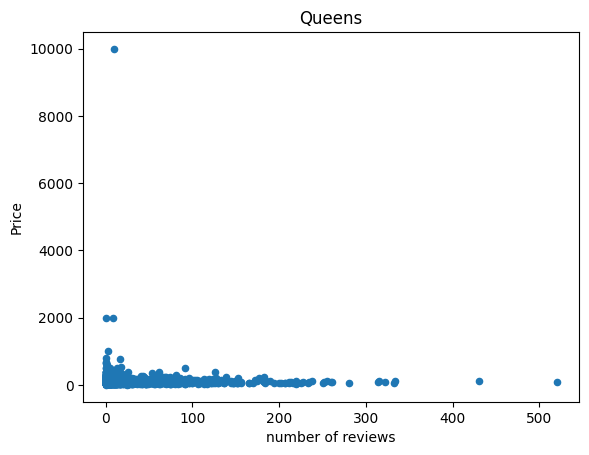

<Figure size 640x480 with 0 Axes>

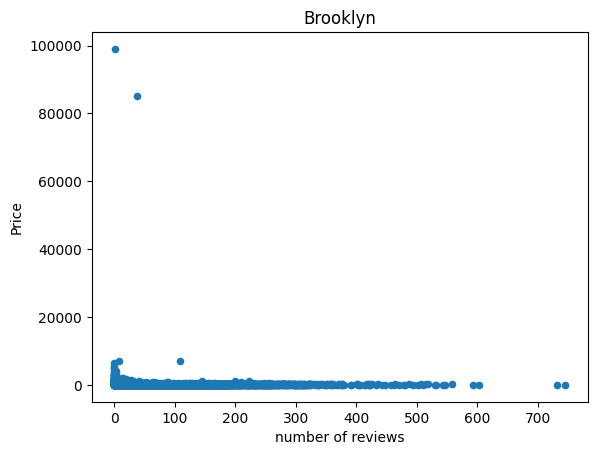

<Figure size 640x480 with 0 Axes>

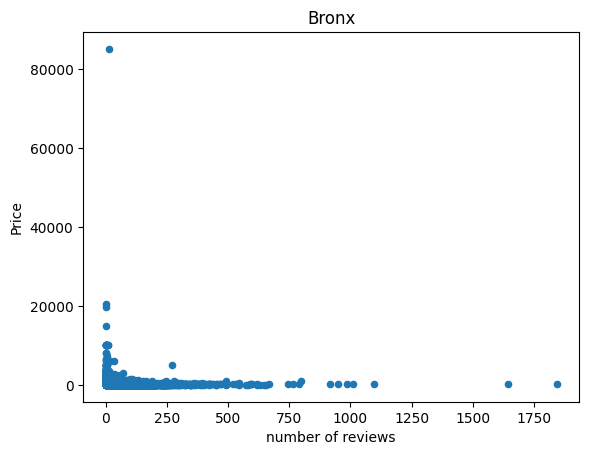

<Figure size 640x480 with 0 Axes>

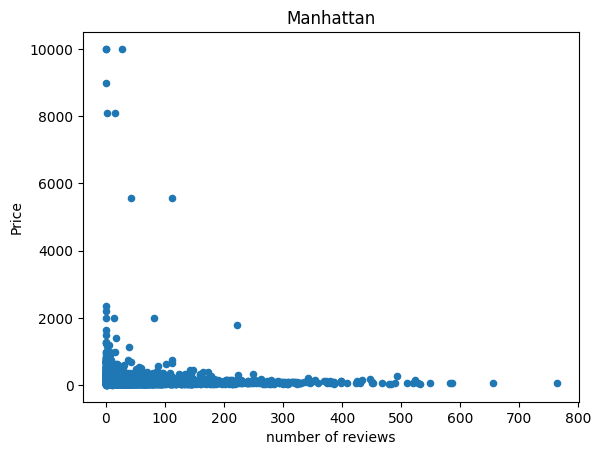

<Figure size 640x480 with 0 Axes>

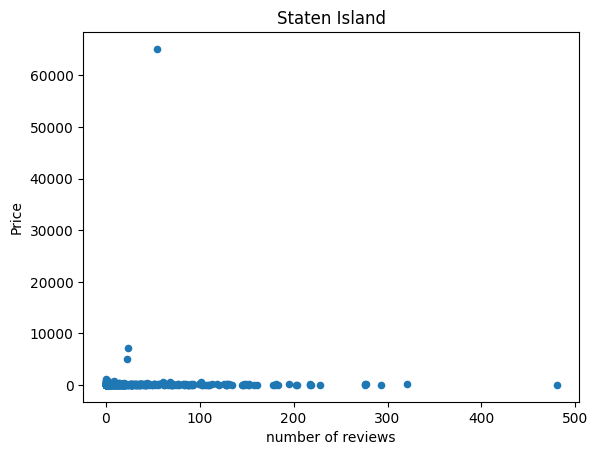

In [ ]:
#Vamos a comparar neighbourhood_group con precio y number of reviews
import matplotlib.pyplot as plt

titles = ['Bronx', 'Brooklyn','Manhattan','Queens','Staten Island']

for i, group in df_room.groupby('neighbourhood_group'):
    plt.figure()
    group.plot(kind='scatter', x='number_of_reviews', y='price',
               xlabel='number of reviews', ylabel='Price',
               title=titles[list(df_room['neighbourhood_group'].unique()).index(i)])
    plt.show()

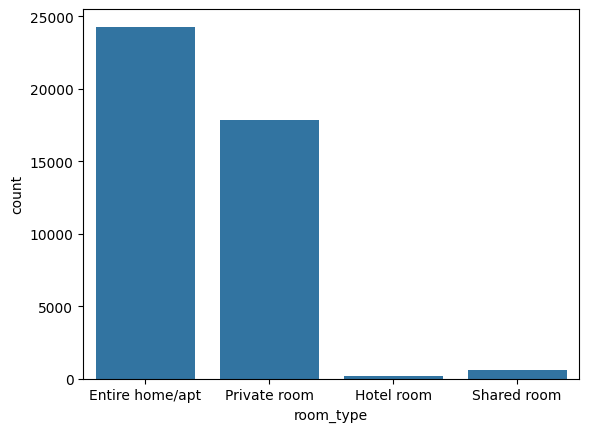

In [ ]:
#Countplot de room_type
#Aqui vemos que esta desbalanceado ya que hay una notoria diferencia por ejemplo entre Hotel room y Entire home
sns.countplot(x= 'room_type', data = df_room)
plt.show()

<ipython-input-35-4f8422e65e10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='price',x='room_type',data=df_room, palette="Set1")


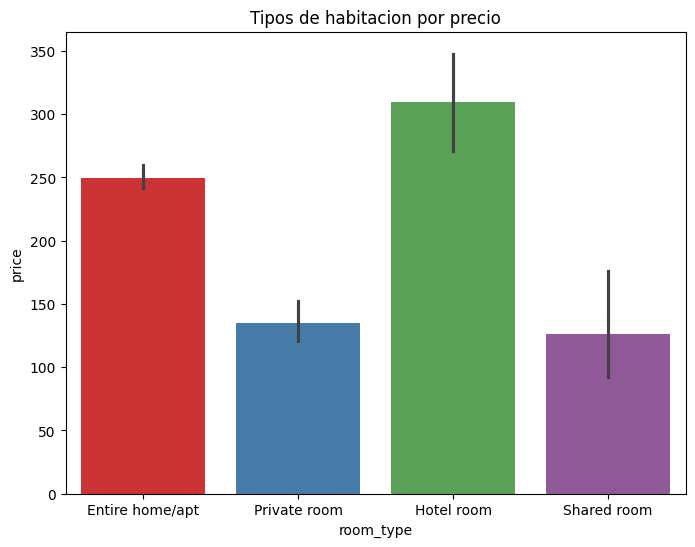

In [ ]:
#Visualizamos los room type por precio
#Hotel room, como hemos visto arriba es de la que menos hay pero es el tipo de habitacion mas caro
plt.figure(figsize=(8,6))
plt.title("Tipos de habitacion por precio")
sns.barplot(y='price',x='room_type',data=df_room, palette="Set1")
plt.show()

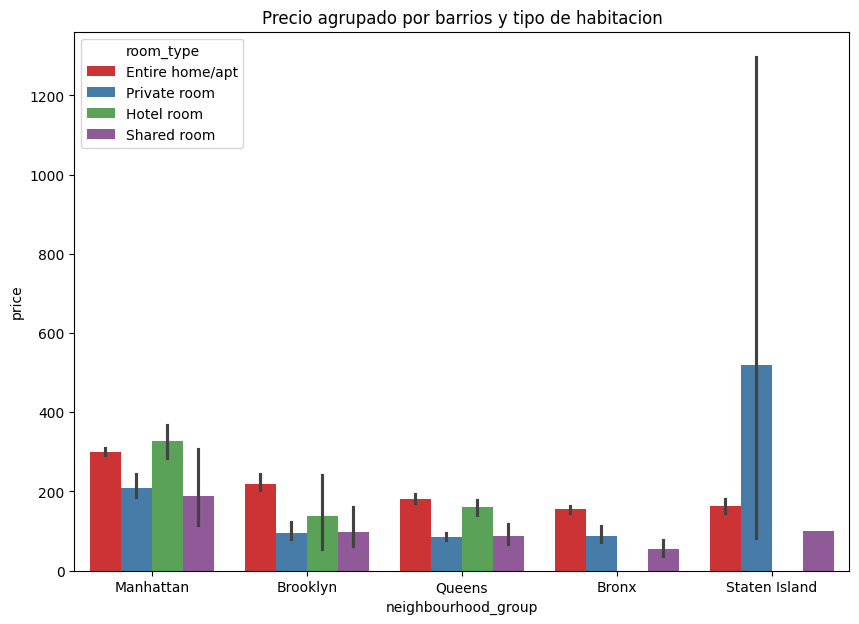

In [ ]:
#Precio agrupado por barrios y tipos de habitacion
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y="price", hue = "room_type",data = df_room, palette="Set1")
plt.title("Precio agrupado por barrios y tipo de habitacion")
plt.show()

<BarContainer object of 10 artists>

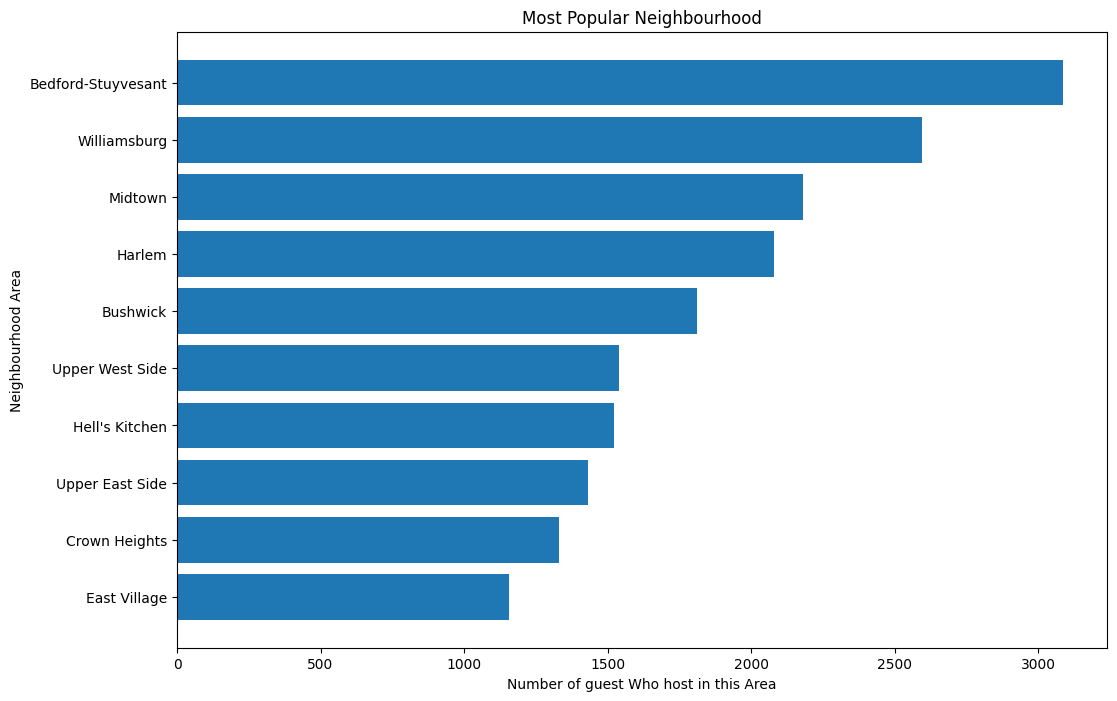

In [ ]:
#Visualizamos los 10 barrios populares
import numpy as np
import matplotlib.pyplot as plt
data = df_room.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

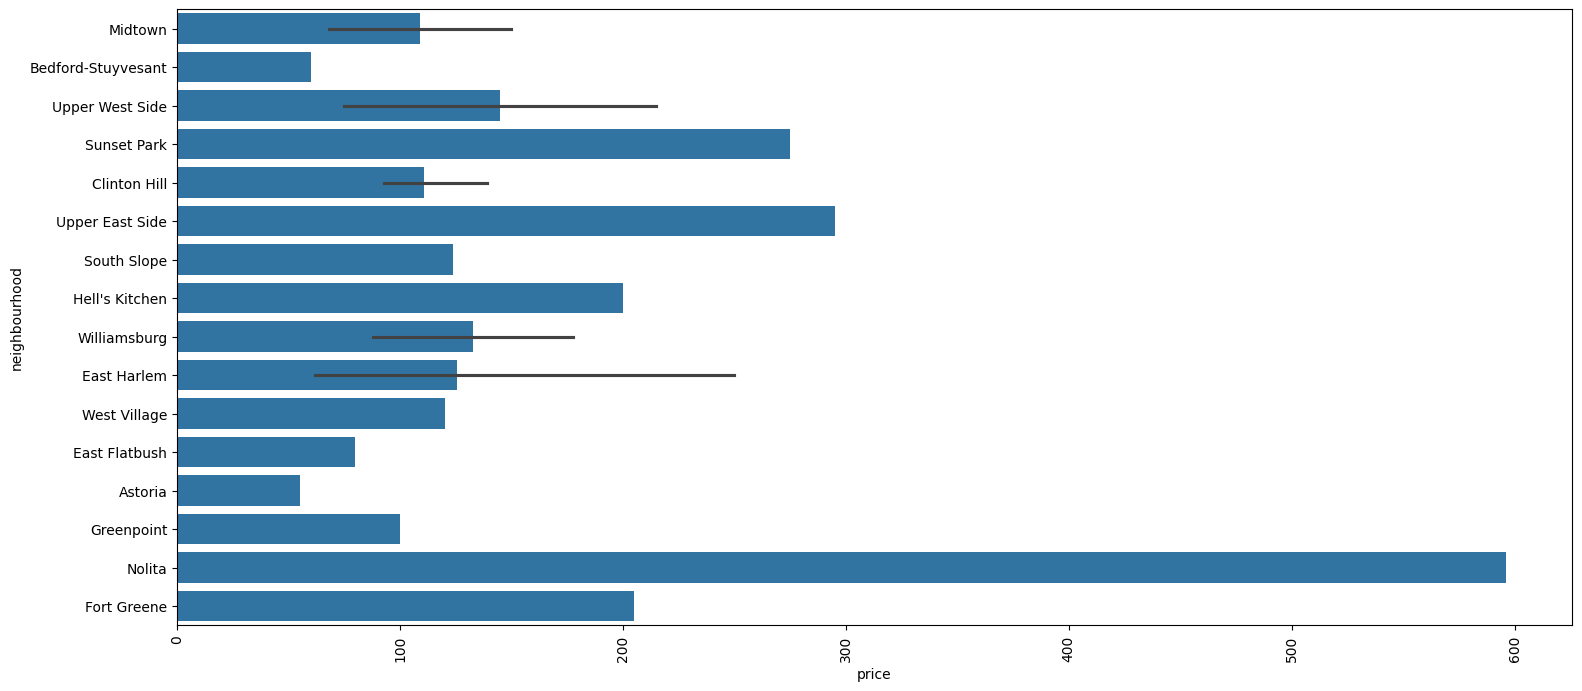

In [ ]:
#neighbourhood - price
plt.figure(figsize=(18,8))
sns.barplot(x=df_room.price[:25], y=df_room.neighbourhood[:25])
plt.xticks(rotation=90)
plt.show()

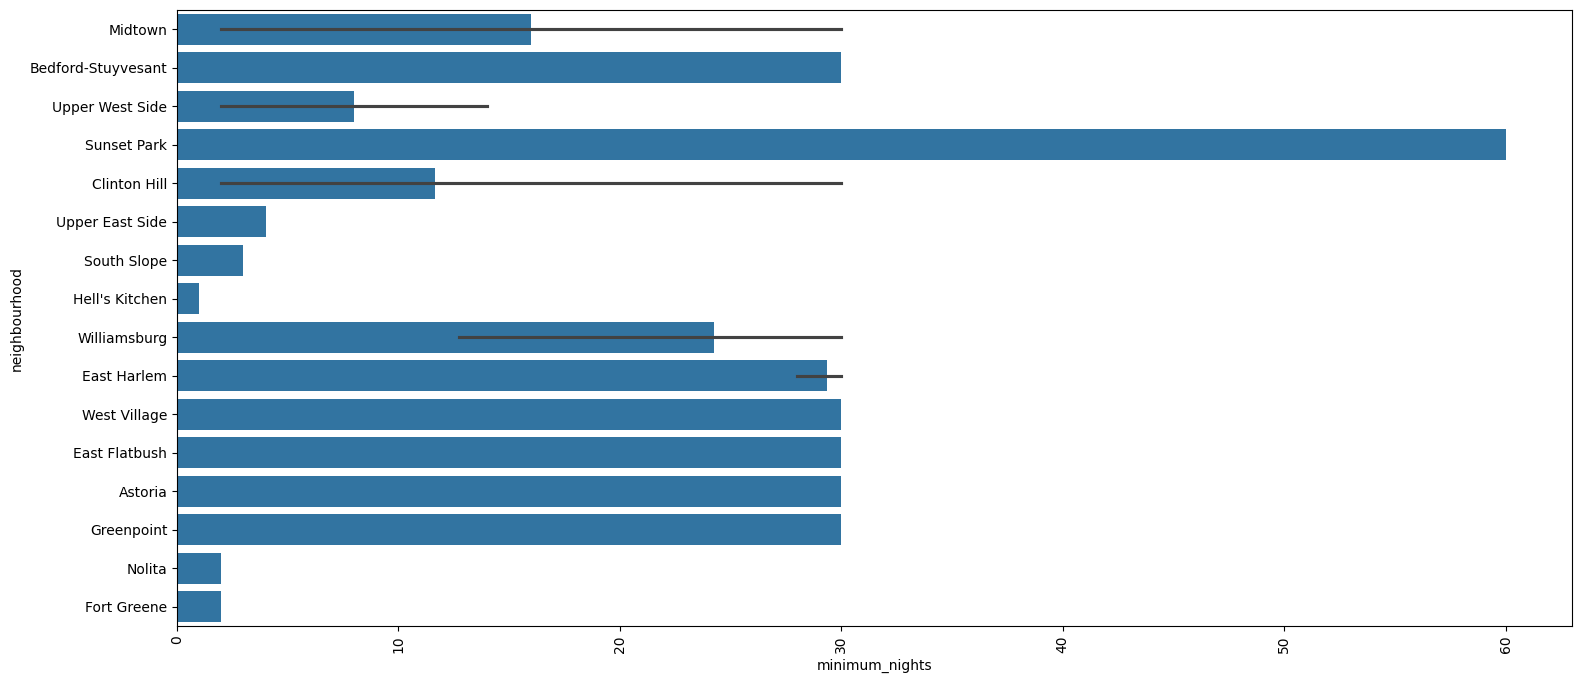

In [ ]:
#neighbourhood - minimum_nights
plt.figure(figsize=(18,8))
sns.barplot(x=df_room.minimum_nights[:25], y=df_room.neighbourhood[:25])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_room['neighbourhood'].value_counts()

neighbourhood
Bedford-Stuyvesant           3086
Williamsburg                 2597
Midtown                      2182
Harlem                       2081
Bushwick                     1810
Upper West Side              1541
Hell's Kitchen               1522
Upper East Side              1432
Crown Heights                1330
East Village                 1155
East Harlem                   854
Chelsea                       825
Astoria                       763
Greenpoint                    752
Lower East Side               700
Washington Heights            652
East Flatbush                 614
Flatbush                      587
Financial District            568
Flushing                      540
West Village                  528
Long Island City              518
Murray Hill                   469
Prospect-Lefferts Gardens     452
Kips Bay                      425
Jamaica                       416
Clinton Hill                  401
Woodside                      372
Ridgewood                     369


In [ ]:
#Sacamos los precios minimo, medio y maximo por noche, y vemos que el valor minimo es 0,
#Lo cual no tiene mucho sentido que haya habitaciones gratuitas.

print(f"Precio medio por noche :  ${df_room.price.mean():.2f}")
print(f"Precio maximo por noche : ${df_room.price.max()}")
print(f"Precio minimo por noche : ${df_room.price.min()}")

Precio medio por noche :  $200.31
Precio maximo por noche : $99000
Precio minimo por noche : $0


In [ ]:
df_room[df_room.price == 0]

host_id neighbourhood_group       neighbourhood   latitude  \
19977  273324213            Brooklyn        Williamsburg  40.720960   
20459  268417148           Manhattan             Midtown  40.744590   
20460  269311462           Manhattan     Upper East Side  40.764420   
20542  197053492           Manhattan  Financial District  40.706510   
20718  265458818           Manhattan           Chinatown  40.716100   
20790  310429455           Manhattan             Midtown  40.759170   
20791  308721299           Manhattan      Hell's Kitchen  40.764040   
20797  309772430               Bronx          Mott Haven  40.815130   
20798  314151200           Manhattan  Financial District  40.704620   
20823  314197504           Manhattan     Lower East Side  40.721860   
20831  262458398           Manhattan             Chelsea  40.747930   
21194  318559292           Manhattan             Midtown  40.750280   
21313  334334264           Manhattan            Kips Bay  40.740970   
21317  342053968           Manhattan     Lower East Side  40.722140   
21399  335389657           Manhattan             Midtown  40.764480   
21480  335072254           Manhattan      Hell's Kitchen  40.767560   
21482  324955773           Manhattan             Midtown  40.760850   
21484  318788301           Manhattan      Hell's Kitchen  40.761750   
22003  360662584           Manhattan        East Village  40.727430   
22694  373324108           Manhattan    Theater District  40.762368   
22751  373522899            Brooklyn        Williamsburg  40.721210   
22823  374516933           Manhattan     Lower East Side  40.719732   
22955  375044940           Manhattan             Chelsea  40.755322   
23155  376877842           Manhattan      Hell's Kitchen  40.765708   
23980  261016212            Brooklyn  Bedford-Stuyvesant  40.696787   
24004  390077597           Manhattan     Upper West Side  40.781629   
24182  390810530           Manhattan             Midtown  40.746836   

       longitude   room_type  price  minimum_nights  number_of_reviews  \
19977 -73.958600  Hotel room      0               1                 83   
20459 -73.985740  Hotel room      0               1                 48   
20460 -73.963030  Hotel room      0               1                  5   
20542 -74.007770  Hotel room      0               1                619   
20718 -73.995180  Hotel room      0               1                348   
20790 -73.969260  Hotel room      0              30                  0   
20791 -73.994780  Hotel room      0              30                 43   
20797 -73.916020  Hotel room      0              30                  0   
20798 -74.010270  Hotel room      0               1                 51   
20823 -73.992780  Hotel room      0              30                  0   
20831 -73.991170  Hotel room      0               1                 83   
21194 -73.985470  Hotel room      0              30                  0   
21313 -73.983390  Hotel room      0              30                  0   
21317 -73.988570  Hotel room      0               1                 73   
21399 -73.980550  Hotel room      0               1                  9   
21480 -73.983120  Hotel room      0               1                 24   
21482 -73.969380  Hotel room      0              30                 59   
21484 -73.988200  Hotel room      0              30                  0   
22003 -73.991360  Hotel room      0               1                  8   
22694 -73.985676  Hotel room      0               1                163   
22751 -73.957209  Hotel room      0               1                  6   
22823 -73.993996  Hotel room      0               1                191   
22955 -74.001772  Hotel room      0               1                  0   
23155 -73.995575  Hotel room      0               1                  1   
23980 -73.958005  Hotel room      0               1                  0   
24004 -73.982004  Hotel room      0               1                  3   
24182 -73.982699  Hote

In [ ]:
#Vemos que hay muchos valores con 0 en el precio y todos en type room Hotel
#Y no tiene sentido en este datset que el precio sea 0

# Contar valores 0 en la columna 'precio'
zeros = df_room[df_room['price'] == 0]
num_zeros = zeros.shape[0]
porcentaje_zeros = (num_zeros / df_room.shape[0]) * 100

print(f'Número de valores 0 en precio: {num_zeros}')
print(f'Porcentaje de valores 0 en precio: {porcentaje_zeros:.2f}%')


Número de valores 0 en precio: 27
Porcentaje de valores 0 en precio: 0.06%


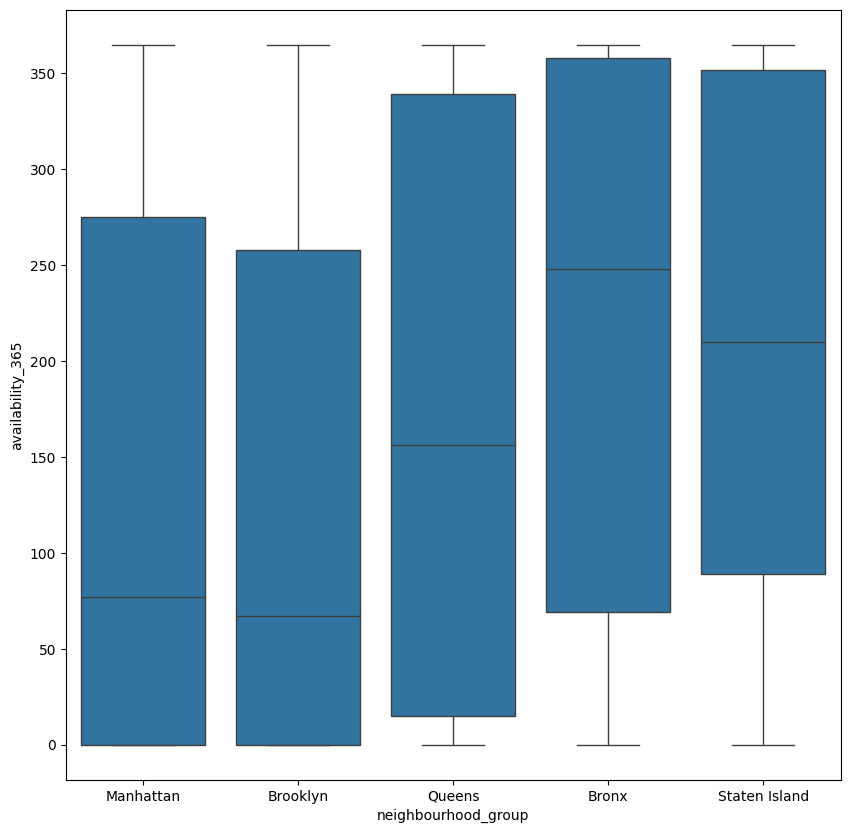

In [ ]:
#Visualizamos neighbourhood_group y availability_365
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_room, x='neighbourhood_group',y='availability_365')

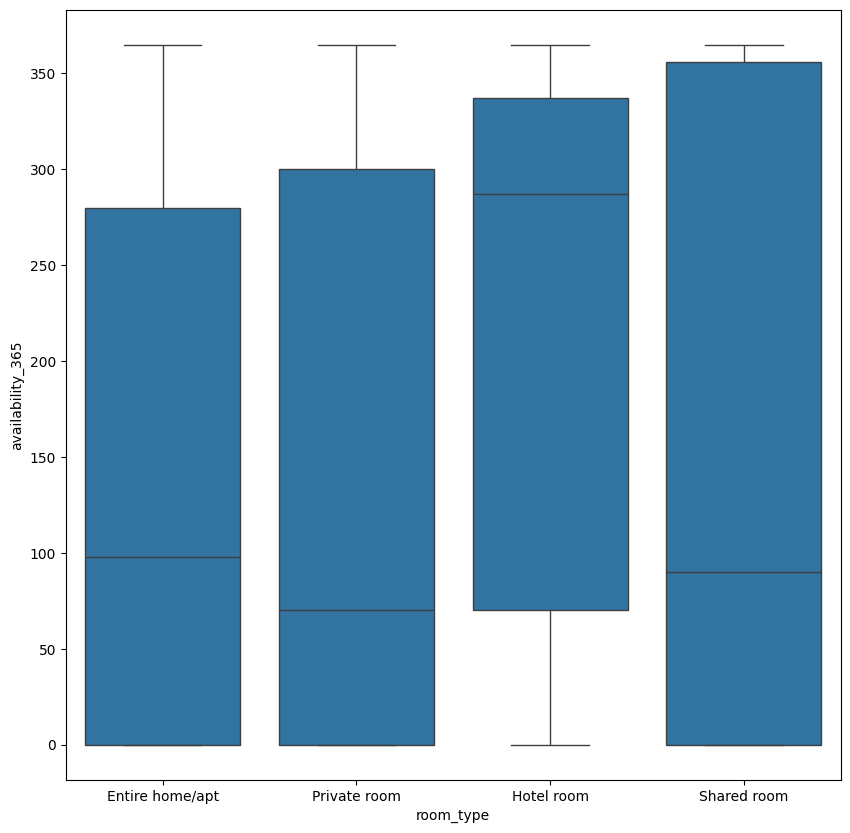

In [ ]:
#Visualizamos room_type y availability_365
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_room, x='room_type',y='availability_365')

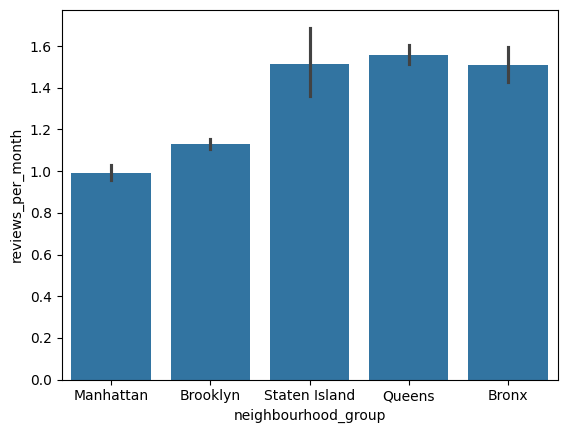

In [ ]:
#neighbourhood_group - reviews_per_month
result = df_room.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df_room, order=result['neighbourhood_group'])
plt.show()

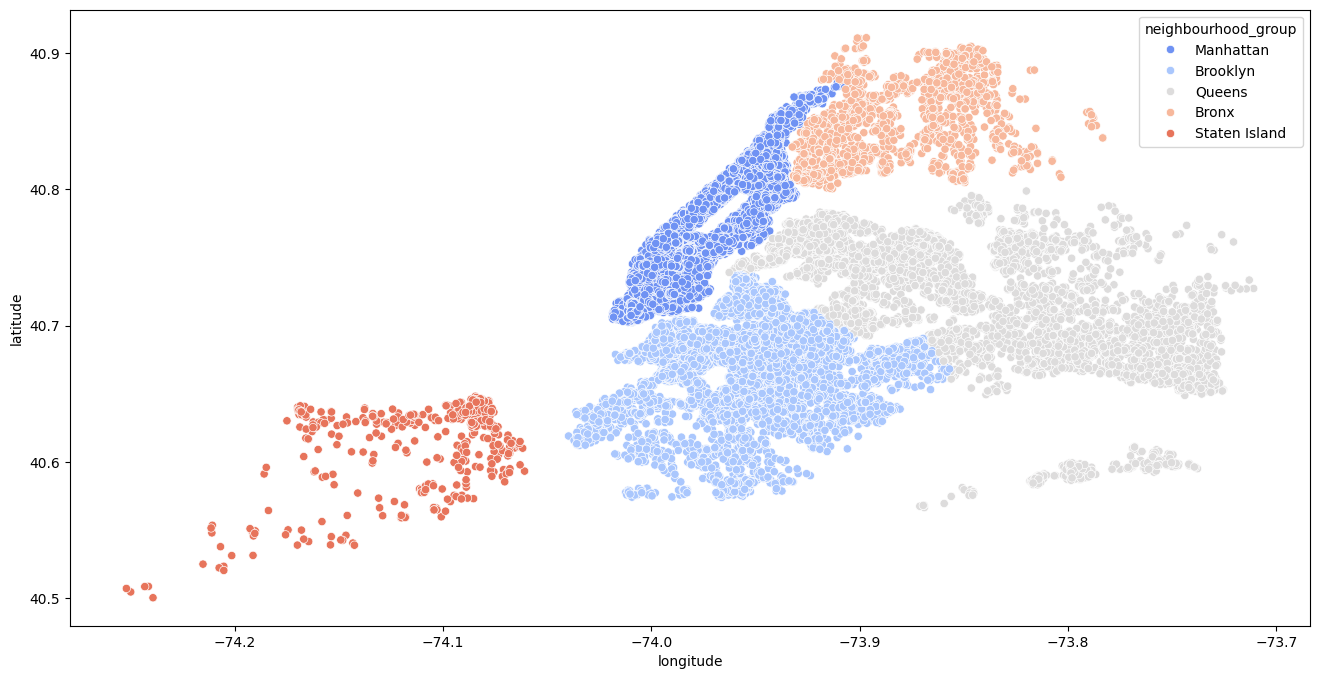

In [ ]:
#Ahora vamos a ver por la longitud y latitud las coordenadas de alojamientos y barrios que tenemos
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df_room["latitude"],x=df_room["longitude"],hue=df_room["neighbourhood_group"],palette="coolwarm")
plt.show()

In [ ]:
#Aqui vemos como estan distribuidos los barrios y si se parece al mapa de NY

Eliminar datos faltantes no es buena opción si no se hace bajo un buen criterio. Dependiendo del caso de uso se puede usar el método de rellenar valores faltantes de forma automática (uso del método bfill por ejemplo).
Vamos a reemplazar los valores nulos del dataframe `room` con un 0 y almacenar el resultado en una variable llamada df_room_with_na_dropped

In [ ]:
df_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              42931 non-null  int64  
 1   neighbourhood_group  42931 non-null  object 
 2   neighbourhood        42931 non-null  object 
 3   latitude             42931 non-null  float64
 4   longitude            42931 non-null  float64
 5   room_type            42931 non-null  object 
 6   price                42931 non-null  int64  
 7   minimum_nights       42931 non-null  int64  
 8   number_of_reviews    42931 non-null  int64  
 9   reviews_per_month    32627 non-null  float64
 10  availability_365     42931 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.6+ MB


In [ ]:
df_room_with_na_dropped = (
    df_room
    .fillna(method='bfill', axis=0)
    .fillna(0)
)
df_room_with_na_dropped.head(5)

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0     2845           Manhattan             Midtown  40.75356  -73.98559   
1     7356            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2     7490           Manhattan     Upper West Side  40.80380  -73.96751   
3     8967           Manhattan             Midtown  40.76457  -73.98317   
4     7378            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    150              30                 49   
1     Private room     60              30                 50   
2     Private room     75               2                118   
3     Private room     68               2                575   
4  Entire home/apt    275              60                  3   

   reviews_per_month  availability_365  
0               0.30               314  
1               0.30               365  
2               0.72                 0  
3               3.41               106  
4               0.03               181

In [ ]:
#Comprobamos que hayamos rellenado los nulos correctamente
df_room_with_na_dropped.isnull().sum()

host_id                0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

Una vez identificamos valores perdidos y algunos métodos para poder rellenarlo hay que trabajar los valores atípicos.
Realizar un análisis de valores atípicos, obteniendo el tipo de columnas y en caso de encontrar alguna columna con valores atípicos definir una estrategia para obtener esos valores y representarlos gráficamente en un histograma.

In [ ]:
#De aqui seria interesante coger las columnas y visualizar los outliers de cada una de ellas,
#vamos a excluir de este analisis las variables categoricas
#los outliers solo se dan en variables numéricas.
#Esto se debe a que los outliers son valores que se desvían significativamente de la distribución general de los datos.
#En el caso de variables categóricas, no hay una noción de distancia o desviación, por lo que no se puede hablar de outliers.

In [ ]:
df_room_outliers=df_room_with_na_dropped.copy()

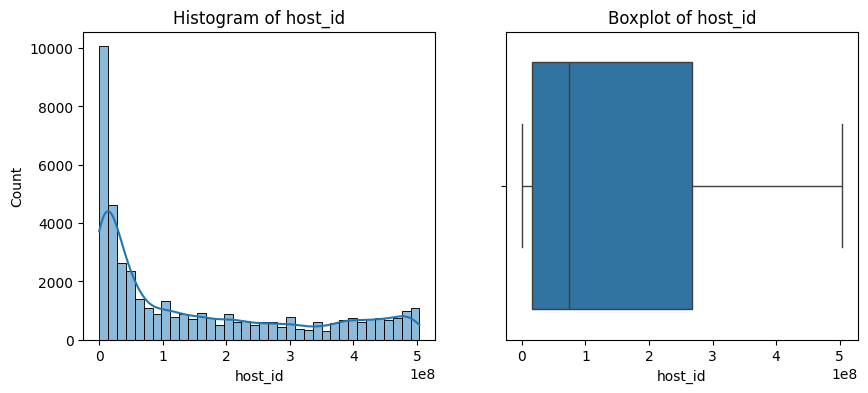

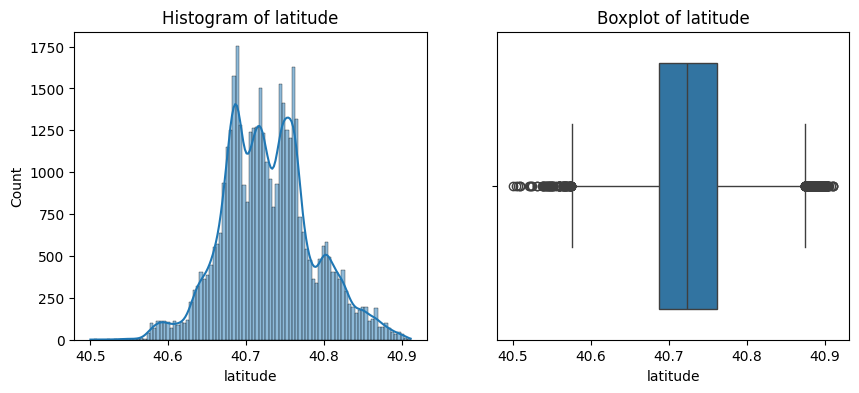

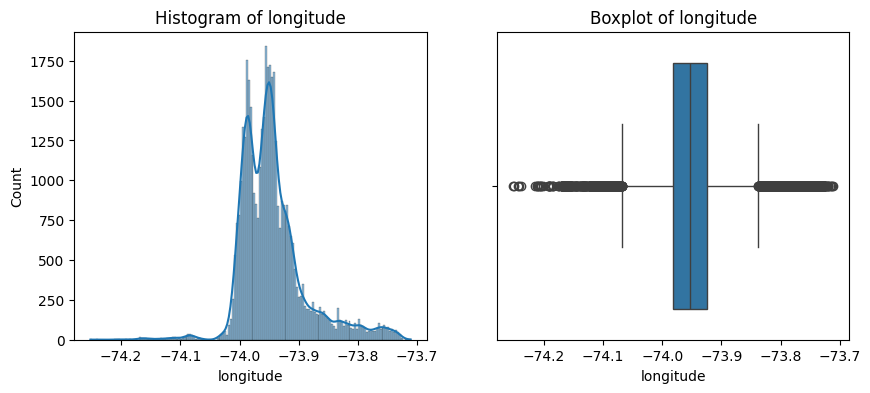

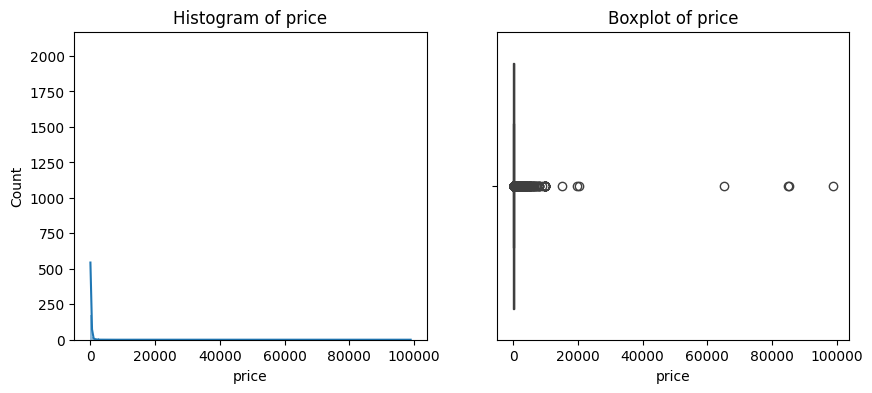

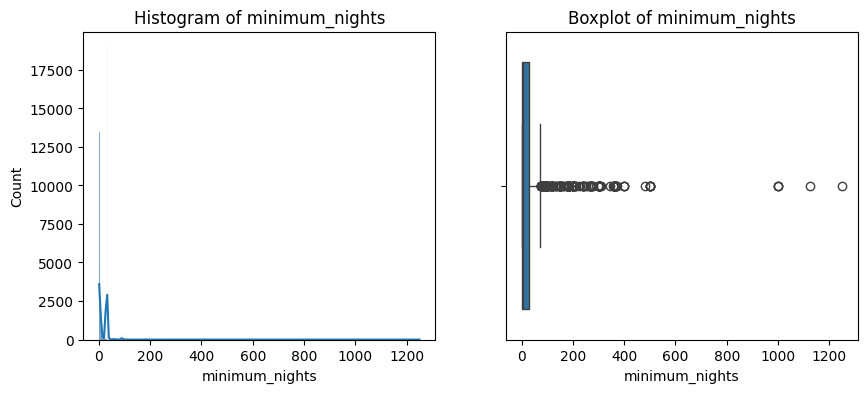

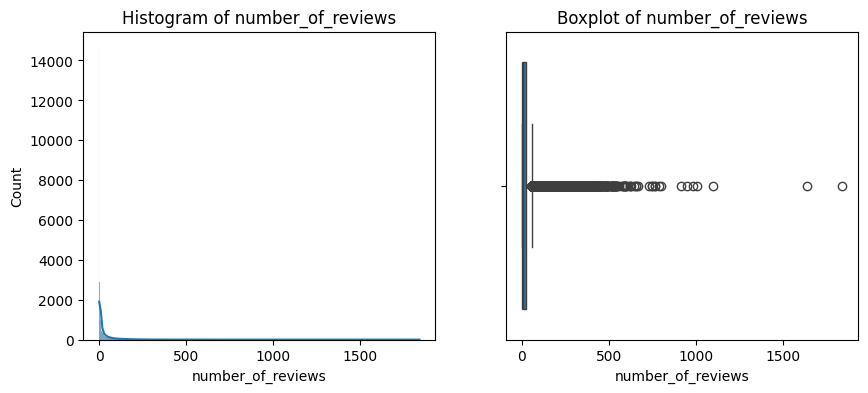

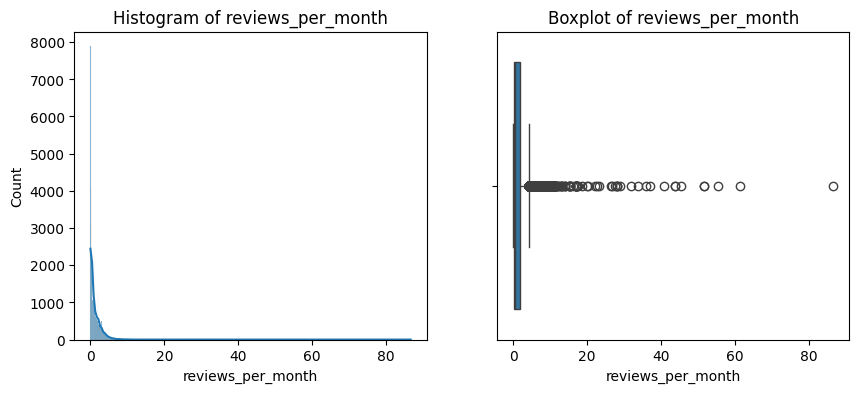

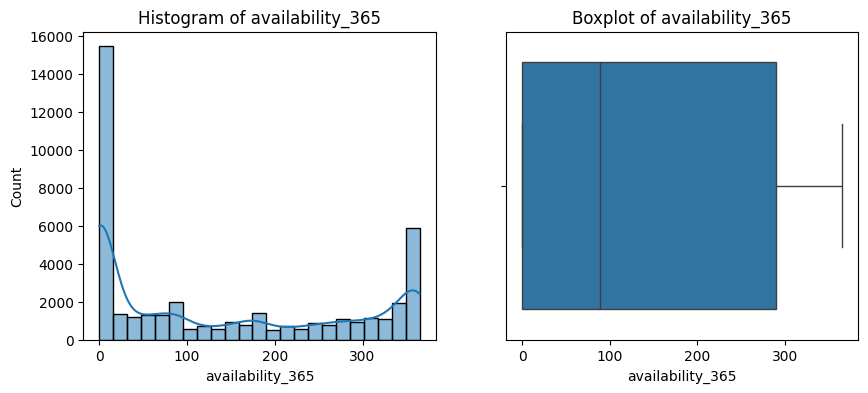

In [ ]:
#Podemos hacer una visualizacion rapida de todas las variables
#Listar las columnas numéricas
numerical_columns = df_room_outliers.select_dtypes(include=['float64', 'int64']).columns

#Crear histogramas y boxplots
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_room_outliers[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_room_outliers[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [ ]:
import plotly.express as px
#Histograma de price para localizar los outliers
fig = px.histogram(df_room_outliers, x=df_room_outliers["price"], title=f"Histogram for column Price")

# Comprobación de valores atípicos
mean = np.mean(df_room_outliers["price"])
std = np.std(df_room_outliers["price"])

print(f"Mean is {mean}")
print(f"Standard is {std}")

atipicos_leves_sup = mean + 1.5*std
atipicos_leves_inf = mean - 1.5*std

fig.add_vline(x=atipicos_leves_sup, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=atipicos_leves_inf, line_width=3, line_dash="dash", line_color="red")

fig.show()

Mean is 200.30716731499382
Standard is 895.0724867435202


In [ ]:
#Como estudiaríamos los outliers por separado, podemos hacer una mejor visualización de ambas colunas eliminando los outliers
#Empezamos con la columna price
# Calculamos el primer y cuarto cuartil
first_quartile = df_room_outliers["price"].quantile(0.25)
third_quartile = df_room_outliers["price"].quantile(0.75)

# Calculamos el rango intercuatilico
iqr = third_quartile - first_quartile

# Eliminamos los outliers
df_room_outliers= df_room_outliers[(df_room_outliers["price"] > (first_quartile - 1.5 * iqr)) &
            (df_room_outliers["price"] < (third_quartile + 1.5 * iqr))]

In [ ]:
#La función shape te va a mostrar el numero de filas, columnas que hay tras la limpieza de outliers
price_shape=df_room_outliers.shape
price_shape

(39638, 11)

In [ ]:
import plotly.express as px
#Histograma de price para localizar los outliers
fig = px.histogram(df_room_outliers, x=df_room_outliers["minimum_nights"], title=f"Histogram for column Minimum Nights")

# Comprobación de valores atípicos
mean = np.mean(df_room_outliers["minimum_nights"])
std = np.std(df_room_outliers["minimum_nights"])

print(f"Mean is {mean}")
print(f"Standard is {std}")

atipicos_leves_sup = mean + 1.5*std
atipicos_leves_inf = mean - 1.5*std

fig.add_vline(x=atipicos_leves_sup, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=atipicos_leves_inf, line_width=3, line_dash="dash", line_color="red")

fig.show()

Mean is 18.518996922145416
Standard is 27.512096700174276


In [ ]:
#Podemos hacer una mejor visualización de ambas colunas eliminando los outliers
#Columna minimum_nights
# Calculamos el primer y cuarto cuartil
first_quartile = df_room_outliers["minimum_nights"].quantile(0.25)
third_quartile = df_room_outliers["minimum_nights"].quantile(0.75)

# Calculamos el rango intercuatilico
iqr = third_quartile - first_quartile

# Eliminamos los outliers
df_room_outliers= df_room_outliers[(df_room_outliers["minimum_nights"] > (first_quartile - 1.5 * iqr)) &
            (df_room_outliers["minimum_nights"] < (third_quartile + 1.5 * iqr))]

In [ ]:
#La función shape te va a mostrar el numero de filas, columnas que hay tras la limpieza de outliers
minimum_nights_shape=df_room_outliers.shape
minimum_nights_shape

(38896, 11)

In [ ]:
import plotly.express as px
#Histograma de price para localizar los outliers
fig = px.histogram(df_room_outliers, x=df_room_outliers["number_of_reviews"], title=f"Histogram for column Number_of_reviews")

# Comprobación de valores atípicos
mean = np.mean(df_room_outliers["number_of_reviews"])
std = np.std(df_room_outliers["number_of_reviews"])

print(f"Mean is {mean}")
print(f"Standard is {std}")

atipicos_leves_sup = mean + 1.5*std
atipicos_leves_inf = mean - 1.5*std

fig.add_vline(x=atipicos_leves_sup, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=atipicos_leves_inf, line_width=3, line_dash="dash", line_color="red")

fig.show()

Mean is 27.20889037433155
Standard is 58.15363243325158


In [ ]:
#Podemos hacer una mejor visualización de ambas colunas eliminando los outliers
#Columna number_of_reviews
# Calculamos el primer y cuarto cuartil
first_quartile = df_room_outliers["number_of_reviews"].quantile(0.25)
third_quartile = df_room_outliers["number_of_reviews"].quantile(0.75)

# Calculamos el rango intercuatilico
iqr = third_quartile - first_quartile

# Eliminamos los outliers
df_room_outliers= df_room_outliers[(df_room_outliers["number_of_reviews"] > (first_quartile - 1.5 * iqr)) &
            (df_room_outliers["number_of_reviews"] < (third_quartile + 1.5 * iqr))]

In [ ]:
#La función shape te va a mostrar el numero de filas, columnas que hay tras la limpieza de outliers
numbre_of_reviews_shape=df_room_outliers.shape
numbre_of_reviews_shape

(34052, 11)

In [ ]:
import plotly.express as px
#Histograma de price para localizar los outliers
fig = px.histogram(df_room_outliers, x=df_room_outliers["availability_365"], title=f"Histogram for column Availability_365")

# Comprobación de valores atípicos
mean = np.mean(df_room_outliers["availability_365"])
std = np.std(df_room_outliers["availability_365"])

print(f"Mean is {mean}")
print(f"Standard is {std}")

atipicos_leves_sup = mean + 1.5*std
atipicos_leves_inf = mean - 1.5*std

fig.add_vline(x=atipicos_leves_sup, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=atipicos_leves_inf, line_width=3, line_dash="dash", line_color="red")

fig.show()

Mean is 133.84165394103135
Standard is 143.65123277156346


In [ ]:
#Podemos hacer una mejor visualización de ambas columnas eliminando los outliers
#Columna availability_365
# Calculamos el primer y cuarto cuartil
first_quartile = df_room_outliers["availability_365"].quantile(0.25)
third_quartile = df_room_outliers["availability_365"].quantile(0.75)

# Calculamos el rango intercuatilico
iqr = third_quartile - first_quartile

# Eliminamos los outliers
df_room_outliers= df_room_outliers[(df_room_outliers["availability_365"] > (first_quartile - 1.5 * iqr)) &
            (df_room_outliers["availability_365"] < (third_quartile + 1.5 * iqr))]

In [ ]:
#La función shape te va a mostrar el numero de filas, columnas que hay tras la limpieza de outliers
availability_365_shape=df_room_outliers.shape
availability_365_shape

(34052, 11)

In [ ]:
import plotly.express as px
#Histograma de price para localizar los outliers en review_per_month
fig = px.histogram(df_room_outliers, x=df_room_outliers["reviews_per_month"], title=f"Histogram for column Reviews_per_month")

# Comprobación de valores atípicos
mean = np.mean(df_room_outliers["reviews_per_month"])
std = np.std(df_room_outliers["reviews_per_month"])

print(f"Mean is {mean}")
print(f"Standard is {std}")

atipicos_leves_sup = mean + 1.5*std
atipicos_leves_inf = mean - 1.5*std

fig.add_vline(x=atipicos_leves_sup, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=atipicos_leves_inf, line_width=3, line_dash="dash", line_color="red")

fig.show()

Mean is 0.9814436743803595
Standard is 1.3283130435963026


In [ ]:
#Podemos hacer una mejor visualización de ambas colunas eliminando los outliers
#Columna reviews_per_month
# Calculamos el primer y cuarto cuartil
first_quartile = df_room_outliers["reviews_per_month"].quantile(0.25)
third_quartile = df_room_outliers["reviews_per_month"].quantile(0.75)

# Calculamos el rango intercuatilico
iqr = third_quartile - first_quartile

# Eliminamos los outliers
df_room_outliers= df_room_outliers[(df_room_outliers["reviews_per_month"] > (first_quartile - 1.5 * iqr)) &
            (df_room_outliers["reviews_per_month"] < (third_quartile + 1.5 * iqr))]

In [ ]:
#La función shape te va a mostrar el numero de filas, columnas que hay tras la limpieza de outliers
reviews_per_month_shape=df_room_outliers.shape
reviews_per_month_shape

(31761, 11)

In [ ]:
#Por lo que parece tenemos los outliers distribuidos muy parecido a lo largo de nuestro dataset,
#ya que en todas las comprobaciones se nos quedan el mismo numero de columnas.

In [ ]:
df_room_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31761 entries, 0 to 42929
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_id              31761 non-null  int64  
 1   neighbourhood_group  31761 non-null  object 
 2   neighbourhood        31761 non-null  object 
 3   latitude             31761 non-null  float64
 4   longitude            31761 non-null  float64
 5   room_type            31761 non-null  object 
 6   price                31761 non-null  int64  
 7   minimum_nights       31761 non-null  int64  
 8   number_of_reviews    31761 non-null  int64  
 9   reviews_per_month    31761 non-null  float64
 10  availability_365     31761 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.9+ MB


Realizar un perfilado y conclusiones

In [ ]:
!pip install pandas-profiling[notebook]==3.6.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=2e332365c56a0b10b3fa3235b5ca0bb08612af51bfd744c7b0d76f72e3f70098
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Generar el reporte de perfilado
#Lo voy a hace sobre el dataset tratado pero se puede hacer con el sin tratar para comparar o para visualizarlo al inicio del estudio.

import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df_room_outliers, title="Profiling Report")

In [ ]:
#Vemos que tras el analisis y las transformaciones nos han generado un total de 8 duplicados que tendremos que eliminar.
#Si lo comparamos con el reporte del dataset sin tratar, no existian en un inicio duplicados.
#Vemos que hay varias columnas con valores 0
#Si comparamos el perfilado con el dataset sin tratar y con este ya un poquito tratado, vemos que el numero de 0 se ha reducido,
#Con lo cual esto se puede deber a que esos 0 eran outliers y los hemos eliminado al tratar los outliers,
#Pero seguimos viendo que en la columna price sigue habiendo 0 lo cual no tiene mucho sentido en esa columna
#Tipo de columnas que tenemos en el dataset en total 13, 8 numericas, 4 categoricas y 1 en formato texto que es neighbourhood
#Para seguir con el estudio tendriamos que seguir transformando las variables.

In [ ]:
#Si lo comparamos con el reporte del dataset original nos da muchas pistas iniciales de las columnas:
#Ya que despues he eliminado columnas que para mi no tenian valor, es interesante ver el dataset inicial.
#Esto nos da muchas pistas sobre el dataset

#license has constant value "41662/AL"	Constant

#host_id is highly overall correlated with id	High correlation
#id is highly overall correlated with host_id	High correlation
#latitude is highly overall correlated with neighbourhood_group	High correlation
#longitude is highly overall correlated with neighbourhood_group	High correlation
#minimum_nights is highly overall correlated with number_of_reviews_ltm and 1 other fields	High correlation
#neighbourhood_group is highly overall correlated with latitude and 1 other fields	High correlation
#number_of_reviews is highly overall correlated with number_of_reviews_ltm and 1 other fields	High correlation
#number_of_reviews_ltm is highly overall correlated with minimum_nights and 2 other fields	High correlation
#reviews_per_month is highly overall correlated with minimum_nights and 2 other fields	High correlation

#last_review has 10304 (24.0%) missing values	Missing
#reviews_per_month has 10304 (24.0%) missing values	Missing
#license has 42930 (> 99.9%) missing values	Missing

#price is highly skewed (γ1 = 81.45449106)	Skewed

#id has unique values	Unique

#number_of_reviews has 10304 (24.0%) zeros	Zeros
#availability_365 has 13990 (32.6%) zeros	Zeros
#number_of_reviews_ltm has 21470 (50.0%) zeros	Zeros

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Veamos si existen duplicados
print(len(df_room_outliers))
print(len(df_room_outliers.drop_duplicates()))

31761
31753


Sabemos que los datos una vez limpios, se pueden usar para entrenar modelos de ML, pero antes de ello hay que cocinar un poco más los datos para que el modelo entienda correctamente los datos de entrada.
Vamos a discretizar 2 de las siguientes columnas que se propone a continuación:
- `Price` : Precio por noche
    `Tipo Discretizacion`: Puedes agrupar los precios en rangos

- `minimum_nights`: Número mínimo de noches para reservar
    `Discretizacion`: Puedes crear categorías como 1-3, 4-7, 8-14, etc.

- `number_of_reviews`: Número total de reseñas
     `Discretizacion` : Puedes agruparlo en intervalos como por ejemplo 0-10,   11-50, 51-100 etc

- `reviews_per_month`: Promedio de reseñas por mes.
     `Discretizacion` : Puedes divirlo en categorías como 0-1, 1-2, etc

- `availability_365`: Número de días que el listado está disponible en un año
    `Discretización`: Crear categorías como 0-100, 101-200 etc

- `last_review`: Fecha de la última reseña
     `Discretizacion`: Puedes extraer el año, mes y día y sustituir los meses por angulos para calcular el seno y coseno.

In [ ]:
df_room_discretize=df_room_outliers.copy()

In [ ]:
df_room_discretize.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  3.176100e+04  31761.000000  31761.000000  31761.000000    31761.000000   
mean   1.484600e+08     40.729034    -73.942906    136.857782       17.915777   
std    1.598670e+08      0.058283      0.056166     81.949606       13.936960   
min    1.678000e+03     40.504560    -74.251907      0.000000        1.000000   
25%    1.643725e+07     40.688023    -73.980114     72.000000        2.000000   
50%    7.000756e+07     40.724184    -73.951792    119.000000       30.000000   
75%    2.648098e+08     40.763320    -73.923580    185.000000       30.000000   
max    5.038729e+08     40.911380    -73.710870    387.000000       70.000000   

       number_of_reviews  reviews_per_month  availability_365  
count       31761.000000       31761.000000      31761.000000  
mean            9.530714           0.720986        130.195176  
std            13.759023           0.799808        143.800220  
min             0.000000           0.000000          0.000000  
25%             1.000000           0.110000          0.000000  
50%             3.000000           0.380000         64.000000  
75%            12.000000           1.010000        280.000000  
max            63.000000           3.170000        365.000000

In [ ]:
# Discretización de la columna 'price'
#Empiezo la etiqueta en '-1', '-float('inf')' porque si la empiezo en 0 me salen 19 valores nulos,
#mi razonamiento es que al empezar a contar en 0,
#Que equivale al primer valor 1, no contabiliza los 0 que existen (aunque en este dataset no tenga sentido que haya 0)
price_bins = [-float('inf'), 50, 100, 150, 200, 387, float('inf')]
price_labels = ['Muy Bajo', 'Bajo', 'Medio', 'Medio Alto', 'Alto', 'Muy alto']
df_room_discretize['price_category'] = pd.cut(df_room_discretize['price'], bins=price_bins, labels=price_labels)

In [ ]:
# Discretización de la columna 'availability_365'
availability_bins = [-float('inf'), 100, 200, 300, float('inf')]
availability_labels = ['Muy Baja Disponibilidad', 'Baja Disponibilidad', 'Moderada Disponibilidad', 'Alta Disponibilidad']
df_room_discretize['availability_category'] = pd.cut(df_room_discretize['availability_365'], bins=availability_bins, labels=availability_labels)

In [ ]:
df_room_discretize.head(5)

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0      2845           Manhattan             Midtown  40.75356  -73.98559   
1      7356            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
4      7378            Brooklyn         Sunset Park  40.66265  -73.99454   
6      8526           Manhattan     Upper East Side  40.76076  -73.96156   
10    16104           Manhattan         East Harlem  40.80107  -73.94255   

          room_type  price  minimum_nights  number_of_reviews  \
0   Entire home/apt    150              30                 49   
1      Private room     60              30                 50   
4   Entire home/apt    275              60                  3   
6   Entire home/apt    295               4                 45   
10     Private room     65              30                  1   

    reviews_per_month  availability_365 price_category  \
0                0.30               314          Medio   
1                0.30               365           Bajo   
4                0.03               181           Alto   
6                0.27                 1           Alto   
10               0.11               204           Bajo   

      availability_category  
0       Alta Disponibilidad  
1       Alta Disponibilidad  
4       Baja Disponibilidad  
6   Muy Baja Disponibilidad  
10  Moderada Disponibilidad

In [ ]:
df_room_discretize.isnull().sum()

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_365         0
price_category           0
availability_category    0
dtype: int64

In [ ]:
#Podriamos seguir tratando el dataset con las columnas originales añadiendo las columnas discretizadas
#Tambien podriamos borrar las variables originales y dejar en su lugar las discretizadas
#Esto dependera de lo que sea mas optimo en cada caso en concreto.
#Una estrategia común es mantener ambas variables durante la fase de exploración y análisis preliminar.
#Esto te permite evaluar el impacto de la discretización y decidir si realmente es beneficiosa.
#Posteriormente, puedes realizar pruebas con tu modelo con y sin la variable original para determinar cuál
#configuración proporciona mejores resultados.

Se puede enriquecer el contenido del dataset cuando añades datos adicionales que pueden favorecer tu caso de uso en concreto. Podemos elegir una fuente de datos (libre elección) e intentar unirla a mi conjunto de datos original. Podemos usar columnas que unen la información a otros datos reales como pueden ser direcciones, coordenadas geoespaciales para representarlas en un mapa etc.

In [ ]:
!pip install geopandas

In [ ]:
#Vamos a trabajar sobre una copia del dataset
df_copy_geo = df_room.copy()

In [ ]:
#Supongamos que tenemos tres paradas de metro y queremos añadirlas a nuestro dataset y ver cual es la mas cercana en cada caso
data_metro = {
    'station_name': ['Station 1', 'Station 2', 'Station 3'],
    'latitude': [40.7145, 40.7074, 40.7551],
    'longitude': [-74.0059, -74.0110, -73.9872]
}
df_metro = pd.DataFrame(data_metro)
print(df_metro)

  station_name  latitude  longitude
0    Station 1   40.7145   -74.0059
1    Station 2   40.7074   -74.0110
2    Station 3   40.7551   -73.9872


In [ ]:
from geopy.distance import geodesic

#Función para encontrar la estación de metro más cercana
def find_nearest_station(lat, lon, metro_stations):
    min_distance = float('inf')
    nearest_station = None

    for index, station in metro_stations.iterrows():
        station_coords = (station['latitude'], station['longitude'])
        distance = geodesic((lat, lon), station_coords).meters
        if distance < min_distance:
            min_distance = distance
            nearest_station = station['station_name']

    return nearest_station, min_distance

#Añadir la estación de metro más cercana al dataset de Airbnb
nearest_stations = []

for index, row in df_copy_geo.iterrows():
    lat, lon = row['latitude'], row['longitude']
    station, distance = find_nearest_station(lat, lon, df_metro)
    nearest_stations.append({'nearest_station': station, 'distance_to_station': distance})

df_nearest_stations = pd.DataFrame(nearest_stations)

#Unir los datos de la estación de metro más cercana con el dataset de Airbnb
df_enriched = pd.concat([df_copy_geo, df_nearest_stations], axis=1)
df_enriched.head()

#Ahora tendriamos nuestro dataset con dos columnas mas añadidas, la estacion mas cercana y la distancia a la estacion

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0     2845           Manhattan             Midtown  40.75356  -73.98559   
1     7356            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2     7490           Manhattan     Upper West Side  40.80380  -73.96751   
3     8967           Manhattan             Midtown  40.76457  -73.98317   
4     7378            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt    150              30                 49   
1     Private room     60              30                 50   
2     Private room     75               2                118   
3     Private room     68               2                575   
4  Entire home/apt    275              60                  3   

   reviews_per_month  availability_365 nearest_station  distance_to_station  
0               0.30               314       Station 3           218.474985  
1               0.30               365       Station 2          5319.985960  
2               0.72                 0       Station 3          5657.775112  
3               3.41               106       Station 3          1105.322803  
4               0.03               181       Station 2          5160.516872

El objetivo es automatizar el proceso de análisis exploratorio y limpieza de datos mediante un pipeline, que además mantenga un registro detallado de las métricas clave en cada paso del proceso.
Definimos y creamos un pipeline que incluya:
- Cargar el dataset

- Imputación de valores nulos.

- Discretización de variables escogidas

- Eliminación de columnas con un porcentaje mayor al 85% de valores nulos

In [ ]:
!pip install scikit-lego

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 9.3 MB/s eta 0:00:00


In [ ]:
from sklego.pandas_utils import log_step
import logging

In [ ]:
#Lectura y carga inicial de nuestros datos
df_room_pipe = pd.read_csv("/content/NYC-Airbnb-2023.csv")

<ipython-input-89-1de9e8220337>:2: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
#Generamos una copia del Dataframe original
@log_step
def start_pipeline(dataf):
    return dataf.copy()

In [ ]:
#Visualizamos la informacion del Dataset
@log_step
def dataframe_info(dataf):

    print(dataf.info())

    return dataf

In [ ]:
#Número de nulos
@log_step
def columns_missing_values(dataf):
    for col in dataf.columns:
        col_missing= dataf[col].isna().sum()
        print(f"Hay {col_missing} valores perdidos por columna {col}")
    return dataf

In [ ]:
#Rellenamos los valos faltantes con 0 (fillna)
@log_step
def missing_values(dataf):
    dataf.fillna(0, inplace=True)
    return dataf

In [ ]:
#Discretizamos las variable price
@log_step
def discretize_price(dataf):
    # Definir las categorías
    def categorize(price):
        if price <= 50:
            return 'Muy Bajo'
        elif price <= 100:
            return 'Bajo'
        elif price <= 150:
            return 'Medio Alto'
        elif price <= 200:
            return 'Alto'
        else:
            return 'Muy Alto'
#Crear una nueva columna 'price_category' con las categorías
    dataf['price_category'] = dataf['price'].apply(categorize)
    return dataf

In [ ]:
#Discretizamos las variable availability_365
@log_step
def discretize_availability_365(dataf):
    # Definir las categorías
    def categorize(availability_365):
        if availability_365 <= 100:
            return 'Muy Baja Disponibilidad'
        elif availability_365 <= 200:
            return 'Baja Disponibilidad'
        elif availability_365 <= 300:
            return 'Moderada Disponibilidad'
        else:
            return 'Alta Disponibilidad'

#Crear una nueva columna 'availability_365' con las categorías
    dataf['availability_365_category'] = dataf['availability_365'].apply(categorize)
    return dataf

In [ ]:
#Eliminar las columnas con un porcentaje mayor del 85% de los valores faltantes del df_room_pipe

@log_step
def drop_columns_with_nulls(dataf):
    # Encontrar columnas con más del 85% de valores perdidos
    drop_cols = [col for col in dataf.columns if dataf[col].isna().sum() > (0.85 * len(dataf))]
    # Eliminar las columnas
    dataf.drop(drop_cols, axis=1, inplace=True)
    return dataf


In [ ]:
#Ejecutamos el pipeline
(df_room_pipe
    .pipe(start_pipeline)
    .pipe(dataframe_info)
    .pipe(columns_missing_values)
    .pipe(missing_values)
    .pipe(discretize_price)
    .pipe(discretize_availability_365)
    .pipe(drop_columns_with_nulls)

).head()

[start_pipeline(df)] time=0:00:00.010504 n_obs=42931, n_col=18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews             

id                                         name  host_id  host_name  \
0  2595                        Skylit Midtown Castle     2845   Jennifer   
1  5121                              BlissArtsSpace!     7356      Garon   
2  5203           Cozy Clean Guest Room - Family Apt     7490  MaryEllen   
3  5178             Large Furnished Room Near B'way　     8967   Shunichi   
4  5136  Large Sunny Brooklyn Duplex, Patio + Garden     7378    Rebecca   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0           Manhattan             Midtown  40.75356  -73.98559   
1            Brooklyn  Bedford-Stuyvesant  40.68535  -73.95512   
2           Manhattan     Upper West Side  40.80380  -73.96751   
3           Manhattan             Midtown  40.76457  -73.98317   
4            Brooklyn         Sunset Park  40.66265  -73.99454   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    150              30                 49  2022-06-21   
1     Private room     60              30                 50  2019-12-02   
2     Private room     75               2                118  2017-07-21   
3     Private room     68               2                575  2023-02-19   
4  Entire home/apt    275              60                  3  2022-08-10   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.30                               3               314   
1               0.30                               2               365   
2               0.72                               1                 0   
3               3.41                               1               106   
4               0.03                               1               181   

   number_of_reviews_ltm license price_category availability_365_category  
0                      1       0     Medio Alto       Alta Disponibilidad  
1                      0       0           Bajo       Alta Disponibilidad  
2                      0       0           Bajo   Muy Baja Disponibilidad  
3                     52       0           Bajo       Baja Disponibilidad  
4                      1       0       Muy Alto       Baja Disponibilidad